
# The Lifecycle of a Plot


This notebook is a summary that aims to show the beginning, middle, and end of a single
visualization using Matplotlib. We'll begin with some raw data and
end by saving a figure of a customized visualization. Along the way we'll try
to highlight some neat features and best-practices using Matplotlib.

Our data
========

We'll use the data from the post from which this tutorial was derived.
It contains sales information for a number of companies.

In [1]:
# sphinx_gallery_thumbnail_number = 10
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

Getting Started
=============

First lets generate our figure containing out axes. Recall: the Figure is like a canvas, and the Axes is a part of that canvas on which we will make a particular visualization.


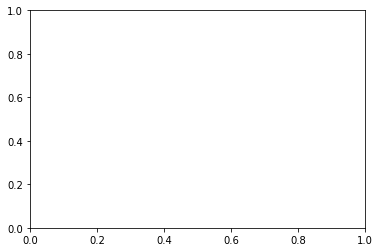

In [2]:
fig, ax = plt.subplots()

Once we have our figure and axes, we can generate our plot within them.

<BarContainer object of 10 artists>

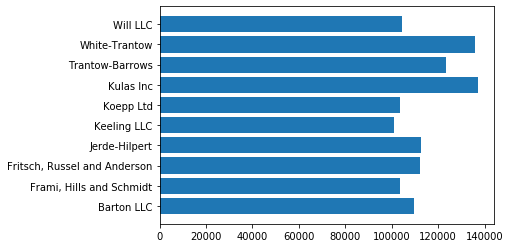

In [3]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

Things to notice:
* There is no heading on the plot.
* X-axis is missing a label.
* It is difficult to compare the bars because there is no backing grid to line up the bar ends.


Applying Style to a Plot
===================

Matplotlib has a wide range of built-in style sheets that can be used to modify the appearance of plots. Styles are applied to the pyplot object and we must re-make plots between style changes to see the results.

[Review the stylesheet reference](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)



In [4]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


You can activate a desired style using the `plyplot.style.use( ... )` function.

In [5]:
plt.style.use('fivethirtyeight')

Now we can re-make the plot using the new style.

<BarContainer object of 10 artists>

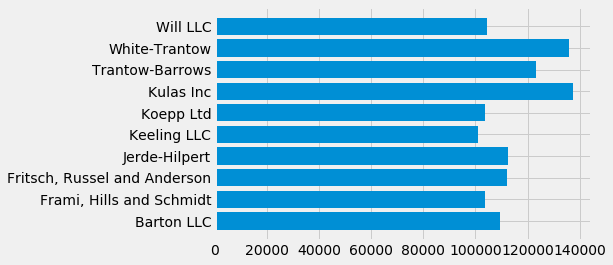

In [6]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

The style controls many things, such as color, linewidths, backgrounds, etc. Not all styles apply to all types of plots. You should experiment to see how the appearance of different plot-types are affected.

Customizing a Plot
=================
Now we've got a plot with the general look that we want, so let's fine-tune
it so that it's ready for print. First let's rotate the labels on the x-axis
so that they show up more clearly. We can gain access to these labels
with the :meth:`axes.Axes.get_xticklabels` method:





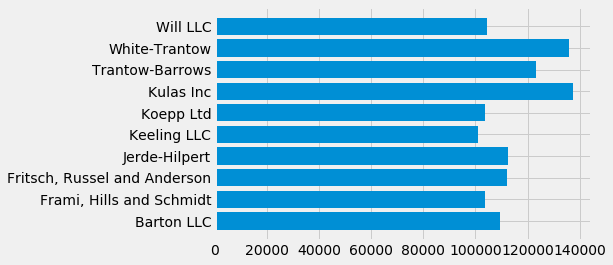

In [7]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()

Matplotlib supports the use of setp() ("set property") and getp() to set and get object properties, as well as to do introspection on the object. If we'd like to set the property of many items at once, it's useful to use
the :func:`pyplot.setp` function. This will take a list (or many lists) of
Matplotlib objects, and attempt to set some style element of each one.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

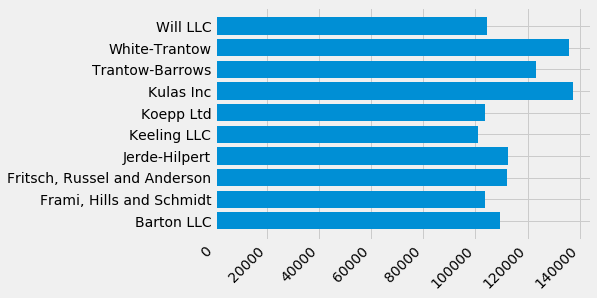

In [8]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

Some times the plotting functions can cut off some of the labels on the bottom. We can tell Matplotlib to automatically make room for elements in the figures that we create. To do this we'll set the autolayout value of our rcParams. For more information on controlling the style, layout, and other features of plots with rcParams, see :doc:/tutorials/introductory/customizing.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

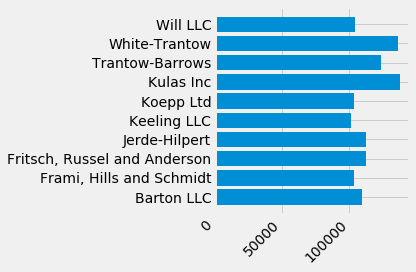

In [9]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

Next, we'll add labels to the plot. To do this with the OO interface,
we can use the :meth:`axes.Axes.set` method to set properties of this
Axes object.


[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

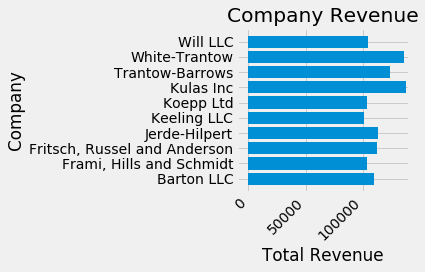

In [10]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

We can also adjust the size of this plot using the :func:pyplot.subplots function. We can do this with the figsize kwarg

[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

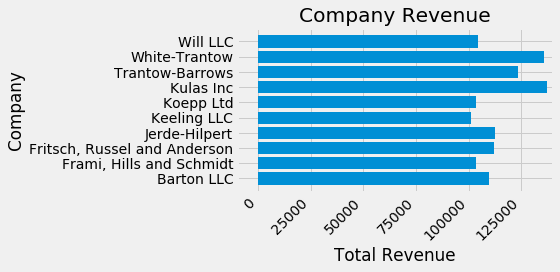

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

For labels, we can specify custom formatting guidelines in the form of
functions by using the :class:`ticker.FuncFormatter` class. Below we'll
define a function that takes an integer as input, and returns a string
as an output.


In [12]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

formatter = FuncFormatter(currency)

We can then apply this formatter to the labels on our plot. To do this,
we'll use the ``xaxis`` attribute of our axis. This lets you perform
actions on a specific axis on our plot

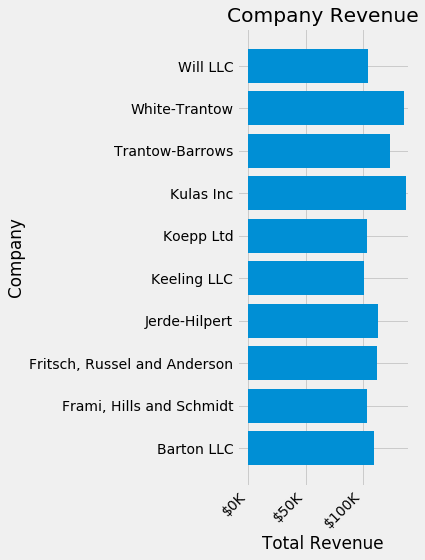

In [13]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)

Combining multiple visualizations
=================================

It is possible to draw multiple plot elements on the same instance of
:class:`axes.Axes`. To do this we simply need to call another one of
the plot methods on that axes object.

`axvline` - Add a vertical line across the axes.
`text` - Add arbitrary text to the plot, specifying the position and style attributes.
`set_xticks` - Specify the xticks that are to be displayed.


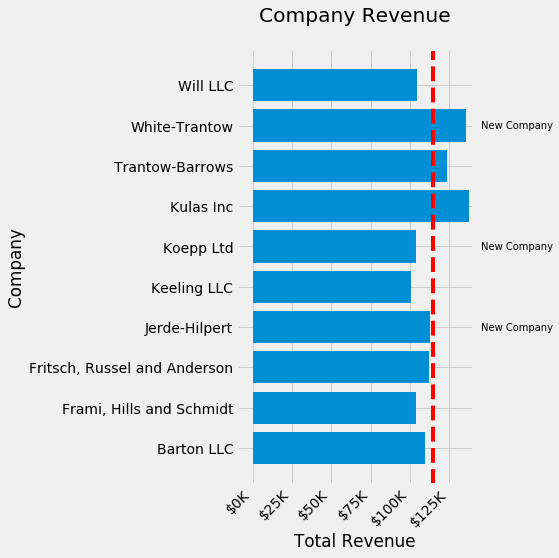

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we'll move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=0.5)

plt.show()

Saving our plot
===============

Now that we're happy with the outcome of our plot, we want to save it to
disk. There are many file formats we can save to in Matplotlib. To see
a list of available options, use:

In [15]:
print(fig.canvas.get_supported_filetypes())

{'ps': 'Postscript', 'eps': 'Encapsulated Postscript', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}


We can then use the :meth:`figure.Figure.savefig` in order to save the figure
to disk. Note that there are several useful flags we'll show below:

* ``transparent=True`` makes the background of the saved figure transparent
  if the format supports it.
* ``dpi=80`` controls the resolution (dots per square inch) of the output.
* ``bbox_inches="tight"`` fits the bounds of the figure to our plot.



In [16]:

fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")